In [36]:
import nilearn as nil
from nilearn import image 
from nilearn import plotting
from nilearn.image import math_img
import numpy as np
import matplotlib.pyplot as plt

In [25]:
ag = image.load_img('/Users/jahchwe/Downloads/AG_mask.nii.gz')
ag_select = image.get_data(ag)
ag_select = np.where(ag_select > 0, 65, 0)
ag_select_nifti = image.new_img_like(ag, ag_select)

tp = image.load_img('/Users/jahchwe/Downloads/temporal pole_association-test_z_FDR_0.01.nii.gz')
# threshold at > 6 and then binarize
tp_select = nil.image.get_data(tp) > 6
tp_select = np.where(tp_select > 0, 35, 0)
tp_select_nifti = image.new_img_like(tp, tp_select)

pmc = image.load_img('/Users/jahchwe/Downloads/DMN.nii.gz')
pmc_select = nil.image.get_data(pmc) == 1
pmc_select = np.where(pmc_select > 0, 39, 0)
pmc_select_nifti = image.new_img_like(pmc, pmc_select)

mpfc = image.load_img('/Users/jahchwe/Downloads/mPFC_SL.nii.gz')
mpfc_select = image.get_data(mpfc)
mpfc_select = np.where(mpfc_select > 0, 21, 0)
mpfc_select_nifti = image.new_img_like(mpfc, mpfc_select)

In [26]:
concat_images = image.concat_imgs([ag_select_nifti, tp_select_nifti, pmc_select_nifti, mpfc_select_nifti])

In [27]:
concat_images.shape

(91, 109, 91, 4)

In [28]:
add_rois = math_img('np.sum(imgs, axis = 3)', imgs = concat_images)

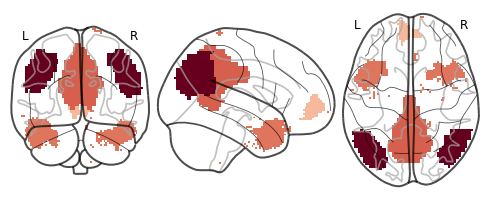

In [40]:
plotting.plot_glass_brain(add_rois, cmap = 'RdBu_r')
plt.savefig('figs/all_rois_color_by_event_number.svg', dpi = 200)

In [7]:
np.unique(_select)

NameError: name '_select' is not defined